<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [ ]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install scikit-learn

We will import the following libraries for the lab


In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [ ]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [ ]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")


In [ ]:
data.head()

In [ ]:

X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

In [ ]:
X.head(100)

## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [ ]:
# students get this 
transform = preprocessing.StandardScaler()

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


we can see we only have 18 test samples.


In [ ]:
Y_test.shape

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [ ]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


Lets look at the confusion matrix:


In [ ]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [ ]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


We can plot the confusion matrix


In [ ]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [ ]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


We can plot the confusion matrix


In [ ]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [ ]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


We can plot the confusion matrix


In [ ]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [2]:
# SpaceX Falcon 9 First Stage Landing Prediction - Complete Solution

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y, y_predict):
    """This function plots the confusion matrix"""
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

# Load the datasets
print("Loading datasets...")
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

print("Data shape:", data.shape)
print("Features shape:", X.shape)
print("\nFirst few rows of data:")
print(data.head())
print("\nFirst few rows of features:")
print(X.head())

Loading datasets...
Data shape: (90, 18)
Features shape: (90, 83)

First few rows of data:
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCoun

In [3]:
# TASK 1: Create NumPy array from the column 'Class' in data
print("\n=== TASK 1: Creating target variable Y ===")
Y = data['Class'].to_numpy()
print("Y shape:", Y.shape)
print("Y values distribution:", np.bincount(Y))
print("Sample Y values:", Y[:10])


=== TASK 1: Creating target variable Y ===
Y shape: (90,)
Y values distribution: [30 60]
Sample Y values: [0 0 0 0 0 0 1 1 0 0]


In [4]:
# TASK 2: Standardize the data in X
print("\n=== TASK 2: Standardizing features ===")
# Initialize the scaler
transform = preprocessing.StandardScaler()
# Fit and transform the data
X = transform.fit_transform(X)
print("X shape after standardization:", X.shape)
print("X mean after standardization:", np.mean(X, axis=0)[:5])  # Should be close to 0
print("X std after standardization:", np.std(X, axis=0)[:5])   # Should be close to 1



=== TASK 2: Standardizing features ===
X shape after standardization: (90, 83)
X mean after standardization: [ 1.48029737e-17 -1.41861831e-16 -7.27812872e-17 -1.97372982e-17
  5.92118946e-17]
X std after standardization: [1. 1. 1. 1. 1.]


In [5]:


# TASK 3: Split data into training and test sets
print("\n=== TASK 3: Splitting data ===")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("Y_test shape:", Y_test.shape)



=== TASK 3: Splitting data ===
Training set size: (72, 83)
Test set size: (18, 83)
Y_test shape: (18,)


In [6]:
# TASK 4: Logistic Regression with GridSearchCV
print("\n=== TASK 4: Logistic Regression ===")
parameters = {'C': [0.01, 0.1, 1],
              'penalty': ['l2'],
              'solver': ['lbfgs']}

lr = LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

print("Tuned hyperparameters (best parameters):", logreg_cv.best_params_)
print("Accuracy:", logreg_cv.best_score_)



=== TASK 4: Logistic Regression ===
Tuned hyperparameters (best parameters): {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.8464285714285713



=== TASK 5: Logistic Regression Test Accuracy ===
Logistic Regression Test Accuracy: 0.8333333333333334
Confusion Matrix for Logistic Regression:


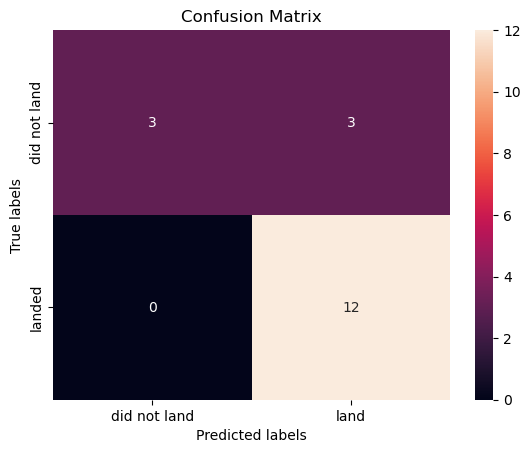

In [7]:

# TASK 5: Calculate accuracy on test data for Logistic Regression
print("\n=== TASK 5: Logistic Regression Test Accuracy ===")
lr_test_accuracy = logreg_cv.score(X_test, Y_test)
print("Logistic Regression Test Accuracy:", lr_test_accuracy)

# Plot confusion matrix for Logistic Regression
print("Confusion Matrix for Logistic Regression:")
yhat_lr = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_lr)


In [8]:
# TASK 6: Support Vector Machine with GridSearchCV
print("\n=== TASK 6: Support Vector Machine ===")
parameters = {'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma': np.logspace(-3, 3, 5)}

svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

print("Tuned hyperparameters (best parameters):", svm_cv.best_params_)
print("Accuracy:", svm_cv.best_score_)



=== TASK 6: Support Vector Machine ===
Tuned hyperparameters (best parameters): {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
Accuracy: 0.8482142857142856



=== TASK 7: SVM Test Accuracy ===
SVM Test Accuracy: 0.8333333333333334
Confusion Matrix for SVM:


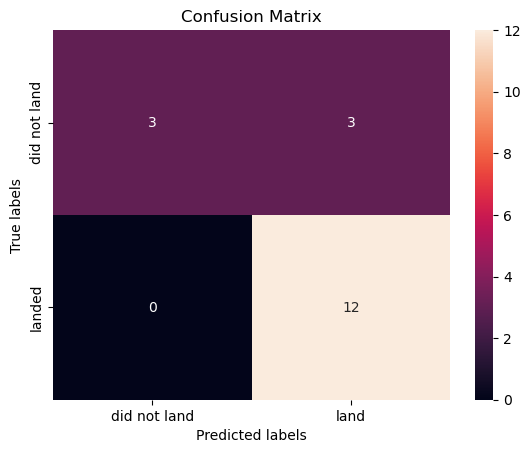

In [9]:
# TASK 7: Calculate accuracy on test data for SVM
print("\n=== TASK 7: SVM Test Accuracy ===")
svm_test_accuracy = svm_cv.score(X_test, Y_test)
print("SVM Test Accuracy:", svm_test_accuracy)

# Plot confusion matrix for SVM
print("Confusion Matrix for SVM:")
yhat_svm = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_svm)


In [10]:
# TASK 8: Decision Tree with GridSearchCV
print("\n=== TASK 8: Decision Tree ===")
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2*n for n in range(1, 10)],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)

print("Tuned hyperparameters (best parameters):", tree_cv.best_params_)
print("Accuracy:", tree_cv.best_score_)



=== TASK 8: Decision Tree ===
Tuned hyperparameters (best parameters): {'criterion': 'entropy', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
Accuracy: 0.875


/home/naveed-ur-rehman/anaconda3/envs/MD/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/home/naveed-ur-rehman/anaconda3/envs/MD/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/naveed-ur-rehman/anaconda3/envs/MD/lib/python3.10/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/naveed-ur-rehman/anaconda3/envs/MD/lib/python3.10/site-packages/sklearn/base.py", lin


=== TASK 9: Decision Tree Test Accuracy ===
Decision Tree Test Accuracy: 0.7222222222222222
Confusion Matrix for Decision Tree:


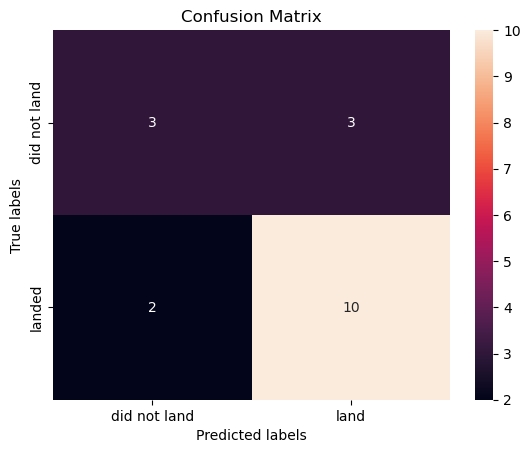

In [11]:
# TASK 9: Calculate accuracy on test data for Decision Tree
print("\n=== TASK 9: Decision Tree Test Accuracy ===")
tree_test_accuracy = tree_cv.score(X_test, Y_test)
print("Decision Tree Test Accuracy:", tree_test_accuracy)

# Plot confusion matrix for Decision Tree
print("Confusion Matrix for Decision Tree:")
yhat_tree = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_tree)


In [12]:

# TASK 10: K-Nearest Neighbors with GridSearchCV
print("\n=== TASK 10: K-Nearest Neighbors ===")
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

print("Tuned hyperparameters (best parameters):", knn_cv.best_params_)
print("Accuracy:", knn_cv.best_score_)



=== TASK 10: K-Nearest Neighbors ===
Tuned hyperparameters (best parameters): {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy: 0.8482142857142858



=== TASK 11: KNN Test Accuracy ===
KNN Test Accuracy: 0.8333333333333334
Confusion Matrix for KNN:


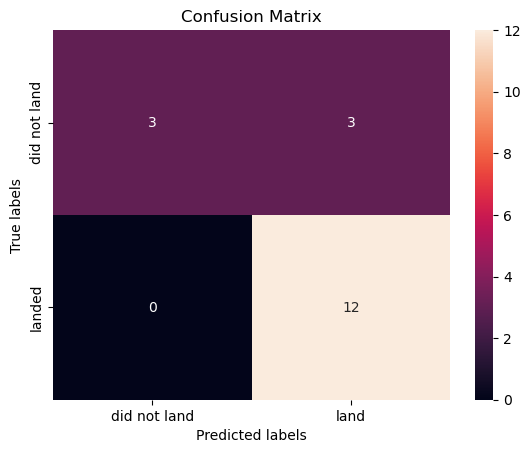

In [13]:
# TASK 11: Calculate accuracy on test data for KNN
print("\n=== TASK 11: KNN Test Accuracy ===")
knn_test_accuracy = knn_cv.score(X_test, Y_test)
print("KNN Test Accuracy:", knn_test_accuracy)

# Plot confusion matrix for KNN
print("Confusion Matrix for KNN:")
yhat_knn = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_knn)



=== TASK 12: Model Comparison ===
Model Performance Summary:
Logistic Regression:
  Cross-Validation Score: 0.8464
  Test Accuracy: 0.8333
  Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}

Support Vector Machine:
  Cross-Validation Score: 0.8482
  Test Accuracy: 0.8333
  Best Parameters: {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}

Decision Tree:
  Cross-Validation Score: 0.8750
  Test Accuracy: 0.7222
  Best Parameters: {'criterion': 'entropy', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}

K-Nearest Neighbors:
  Cross-Validation Score: 0.8482
  Test Accuracy: 0.8333
  Best Parameters: {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}

BEST MODEL ANALYSIS:
Best Cross-Validation Score: Decision Tree (0.8750)
Best Test Accuracy: Logistic Regression (0.8333)


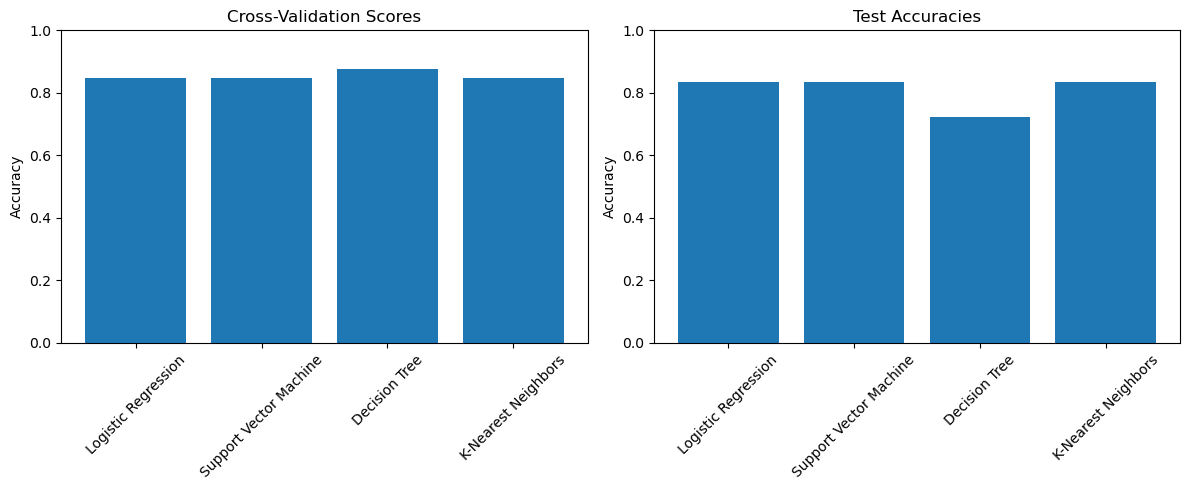


CONCLUSION:
There's a discrepancy: Decision Tree has the best CV score, 
while Logistic Regression has the best test accuracy.
This suggests potential overfitting or variance in model performance.

Model Performance Statistics:
Average CV Score: 0.8545 ± 0.0119
Average Test Accuracy: 0.8056 ± 0.0481


In [14]:

# TASK 12: Find the method that performs best
print("\n=== TASK 12: Model Comparison ===")
results = {
    'Logistic Regression': {
        'CV Score': logreg_cv.best_score_,
        'Test Accuracy': lr_test_accuracy,
        'Best Params': logreg_cv.best_params_
    },
    'Support Vector Machine': {
        'CV Score': svm_cv.best_score_,
        'Test Accuracy': svm_test_accuracy,
        'Best Params': svm_cv.best_params_
    },
    'Decision Tree': {
        'CV Score': tree_cv.best_score_,
        'Test Accuracy': tree_test_accuracy,
        'Best Params': tree_cv.best_params_
    },
    'K-Nearest Neighbors': {
        'CV Score': knn_cv.best_score_,
        'Test Accuracy': knn_test_accuracy,
        'Best Params': knn_cv.best_params_
    }
}

print("Model Performance Summary:")
print("=" * 60)
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Cross-Validation Score: {metrics['CV Score']:.4f}")
    print(f"  Test Accuracy: {metrics['Test Accuracy']:.4f}")
    print(f"  Best Parameters: {metrics['Best Params']}")
    print()

# Find the best performing model
cv_scores = [metrics['CV Score'] for metrics in results.values()]
test_scores = [metrics['Test Accuracy'] for metrics in results.values()]
model_names = list(results.keys())

best_cv_idx = np.argmax(cv_scores)
best_test_idx = np.argmax(test_scores)

print("BEST MODEL ANALYSIS:")
print("=" * 40)
print(f"Best Cross-Validation Score: {model_names[best_cv_idx]} ({cv_scores[best_cv_idx]:.4f})")
print(f"Best Test Accuracy: {model_names[best_test_idx]} ({test_scores[best_test_idx]:.4f})")

# Create a comparison visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(model_names, cv_scores)
plt.title('Cross-Validation Scores')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)

plt.subplot(1, 2, 2)
plt.bar(model_names, test_scores)
plt.title('Test Accuracies')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

print("\nCONCLUSION:")
print("=" * 40)
if cv_scores[best_cv_idx] == max(cv_scores) and test_scores[best_test_idx] == max(test_scores):
    if best_cv_idx == best_test_idx:
        print(f"The {model_names[best_cv_idx]} model performs best on both cross-validation and test data.")
    else:
        print(f"There's a discrepancy: {model_names[best_cv_idx]} has the best CV score, ")
        print(f"while {model_names[best_test_idx]} has the best test accuracy.")
        print("This suggests potential overfitting or variance in model performance.")

# Summary statistics
print(f"\nModel Performance Statistics:")
print(f"Average CV Score: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
print(f"Average Test Accuracy: {np.mean(test_scores):.4f} ± {np.std(test_scores):.4f}")

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
